# Hierarchical Clustering
- Hierarchical Clustering is widely used Unsupervised Learning algorithm.
- Aims to create a tree-like cluster hierarcht(dendogram) within the data.
- No need to specify the number of clusters at the beginning.
- Genelde küçük datalarda kullanılır, büyük datalarda yavaş çalışır ve ciddi hesaplama maliyeti getirir.
- Prediction özelliği yok. Yeni bir data gelirse onu dataframe'e ekleyip yeniden clustering yapmanız lazım. 
- Mümkün olduğunca az sayıda feature ile clustering yapılmalıdır.
### Types of Hierarchical Clustering:
1. Agglomerative(Tümevarım) :
    - Kümelemeyi dendogramın aşağısından yukarıya doğru yapması durumuna Agglomerative Clustering denir.
    - Genelde Agglomerative kullanılır, Divisive tercih edilmez.
    
2. Divisive(Tümdengelim):
    - Kümelemeyi dendogramın yukarısından aşağı doğru yapması durumuna Agglomerative Clustering denir.
    - Divisive kullanırken içerisinde K-means algoritması çalışır.
 
- Ideal clustering is characterised by **minimal intra cluster distance** and **maximal inter cluster distance**.
    - **minimal intra cluster distance:** Cluster içindeki dataların centroid' uzaklıklarının minimum olması.
    - **maximal inter cluster distance:** Cluster'lar arası mesafenin maximum olması.

### HyperParameters:
- **"linkage"**:
    - Bir datanın cluster'lara nasıl atanacağını belirlemek için kullanılan parametredir.
    - default değeri "ward".
    - "ward", "complete", "average", "single" seçilebilir.
    - Eğer linkage="ward" kullanıyorsanız affinity = "euclidean" olmak zorundadır.
    - average : Datanın clusterların merkezine olan uzaklıklarına bakılır. Hangi cluster'a uzaklık az ise data o cluster'a atanır.
    - complete : Datanın cluster'lar içindeki en uzak noktaya olan uzaklığına bakılır. Uzak noktalar ile datanın arasındaki mesafenin en az olduğu cluster'a atama yapılır.
    - single : Datanın cluster'lar içinde olan ve datamıza en yakın olan data'ya uzaklığına bakılır. Hangisine daha yakınsa o cluster'a atanır.
    - ward : Data hangi cluster'a atandığında varyans'ı düşürecekse o cluster'a atanır.
    
- **affinity**: 
    - default değeri "euclidean".
    - "euclidean", "manhattan", "cosine", "precomputed" secilebilir.
    -  "precomputed"  kendi hazırladığınız bir metrictir. Eğer hazırlamadıysanız seçmeyin.



In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [94]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis and Visualization

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [96]:
df.describe()
# Bu data özelinde feature'ların min-max değerleri birbirine yakın olduğu için scaling yapma ihtiyacı duymuyorum.
# Ancak scaling yaparak ve yapmadan deneyip karşılaştırma yapılabilir.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


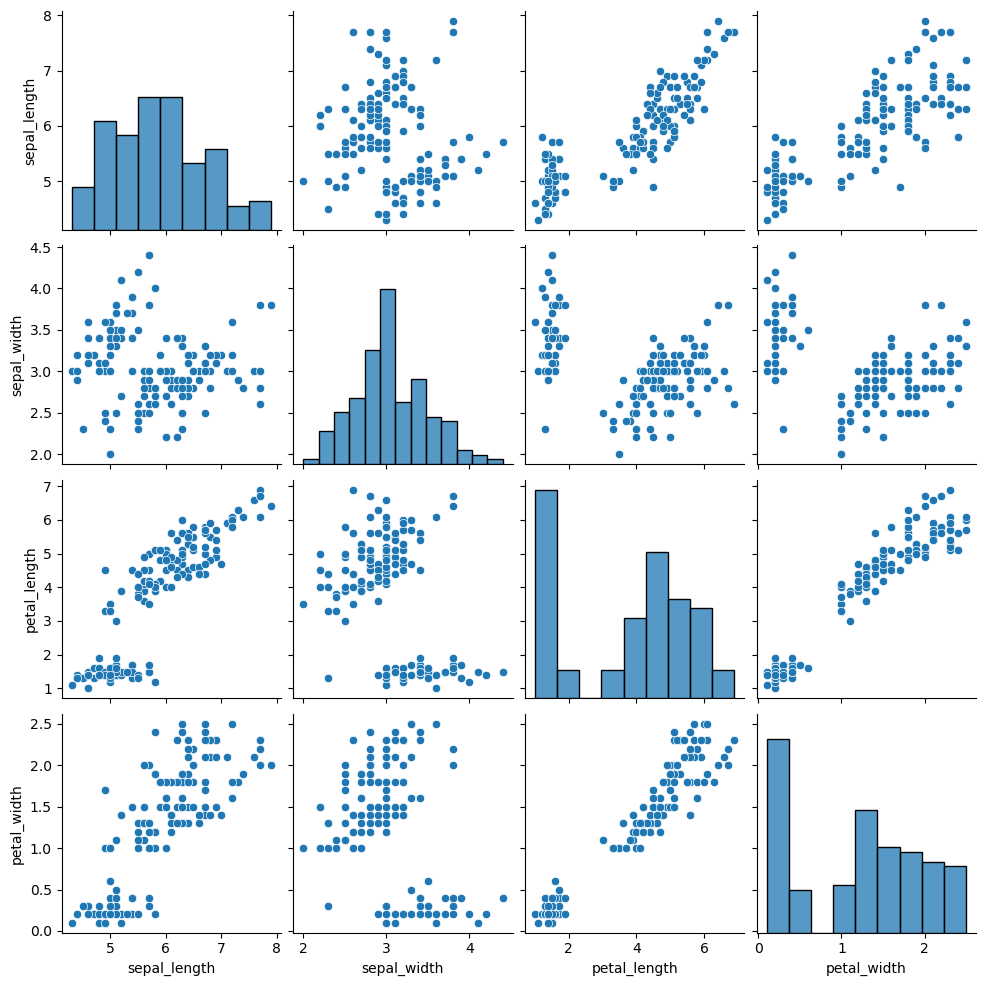

In [97]:
sns.pairplot(df);
# Burada grafiklere bakınca datamızın kolay bir şekilde 2 kümeye ayrıldığını görüyoruz.

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

## Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [98]:
from pyclustertend import hopkins

In [99]:
X = df.copy()

In [100]:
X.shape[0]

150

In [101]:
hopkins(X, X.shape[0])
# Burada hopkins içine dataframe'i ve gözlem sayısını koyuyoruz.
# hopkins score'u 0-0.5 arasında ise datamızın random dağıldığını ve kümelemeye yatkın olduğunu gösterir.
# hopkins score'u 0.5'ten büyükse datanın uniform dağıldığını ve clustering için uygun olmadığını gösterir.

0.16655441395317966

## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [102]:
from scipy.cluster.hierarchy import dendrogram, linkage

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [103]:
hc_ward = linkage(y = X, method="ward")
hc_complete = linkage(y = X, method="complete")
hc_average = linkage(X, method="average")
hc_single = linkage(X, "single")

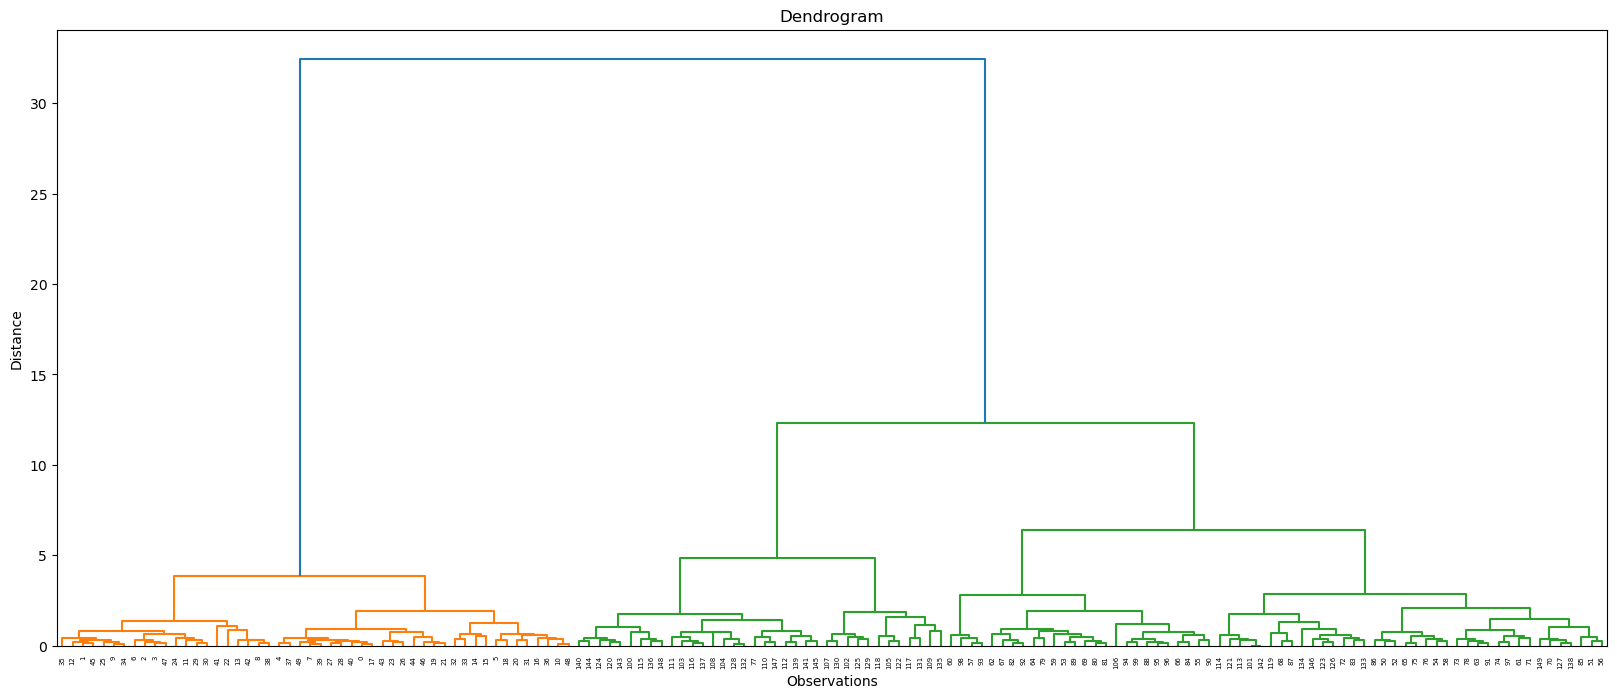

In [104]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")

dendrogram(hc_ward)

plt.show()

In [105]:
hc_names = ["hc_ward", "hc_average", "hc_complete", "hc_single"]
hc_list = [hc_ward, hc_average, hc_complete, hc_single]

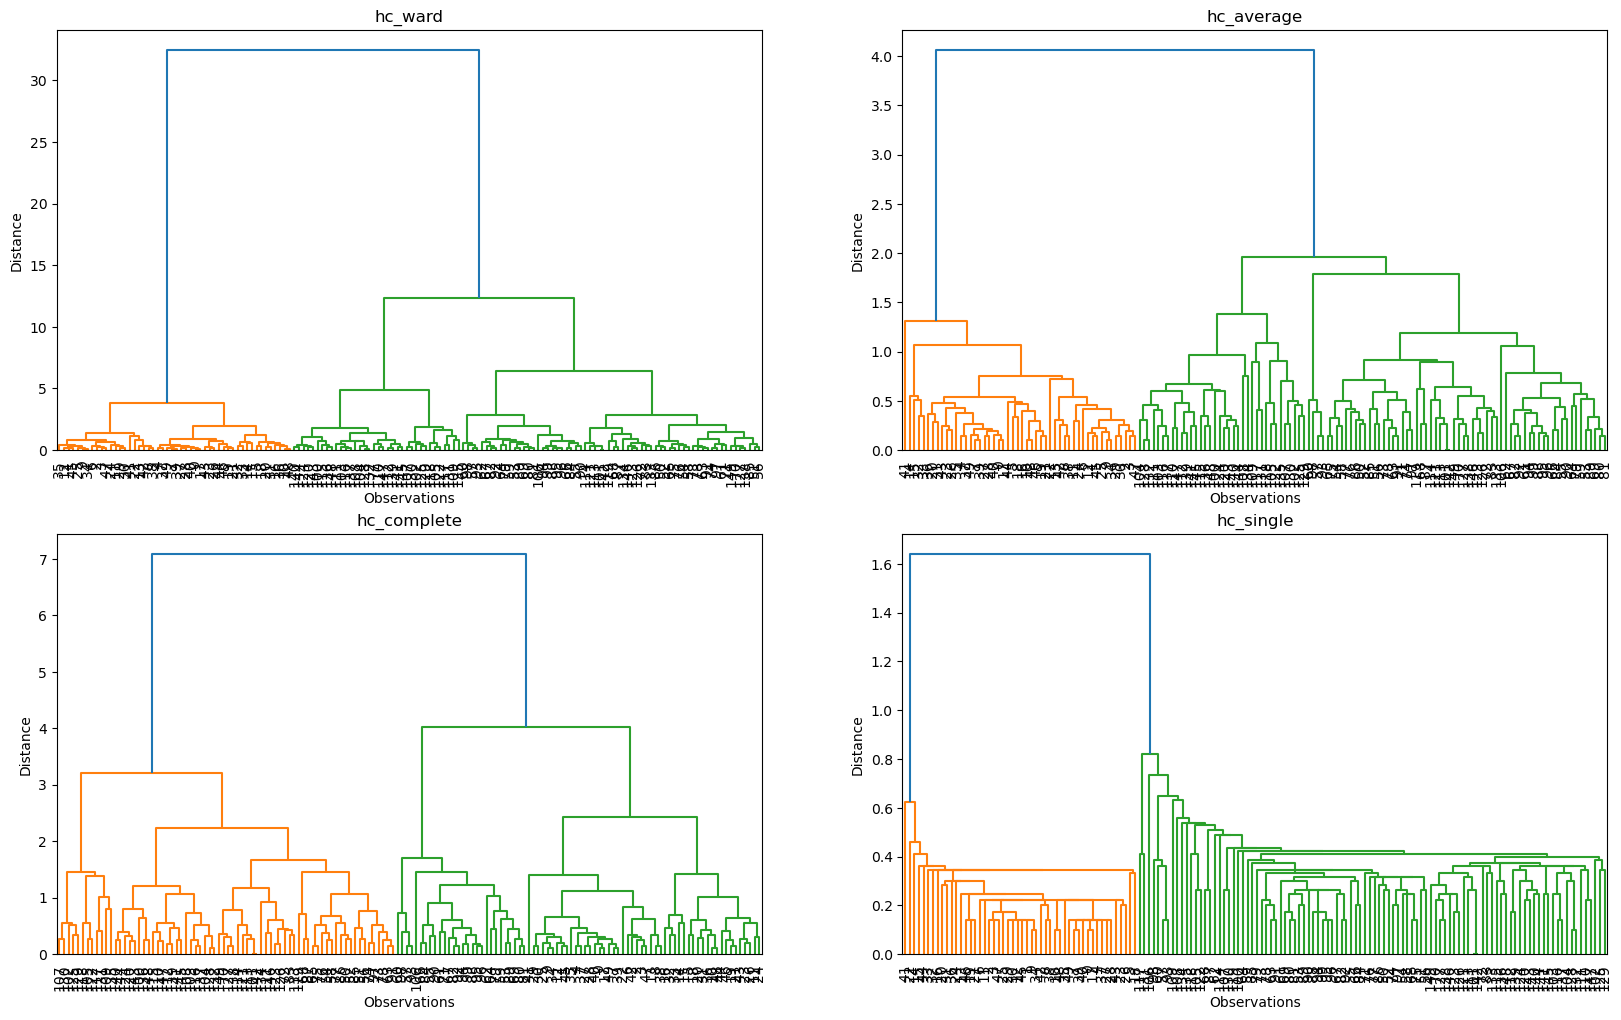

In [106]:
plt.figure(figsize = (20,12))
hc_list = [hc_ward, hc_average, hc_complete, hc_single]
k = 1
for i in hc_list:
    plt.subplot(2,2,k)
    plt.title(hc_names[k-1])  
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(i, leaf_font_size = 10)
    k +=1

In [107]:
# Yukarıdaki grafiklere baktığımız zaman, Line'lar arası mesafe;
    # Ward için yaklaşık 20 birim,
    # Average için yaklaşık 2 birim,
    # Complete için yaklaşık 3 birim,
    # Single için 0.8 birim.
    
# Yani en uzak mesafe 'ward' için geçerli. dolayısıyla en iyi clustering ward ile yapılır.

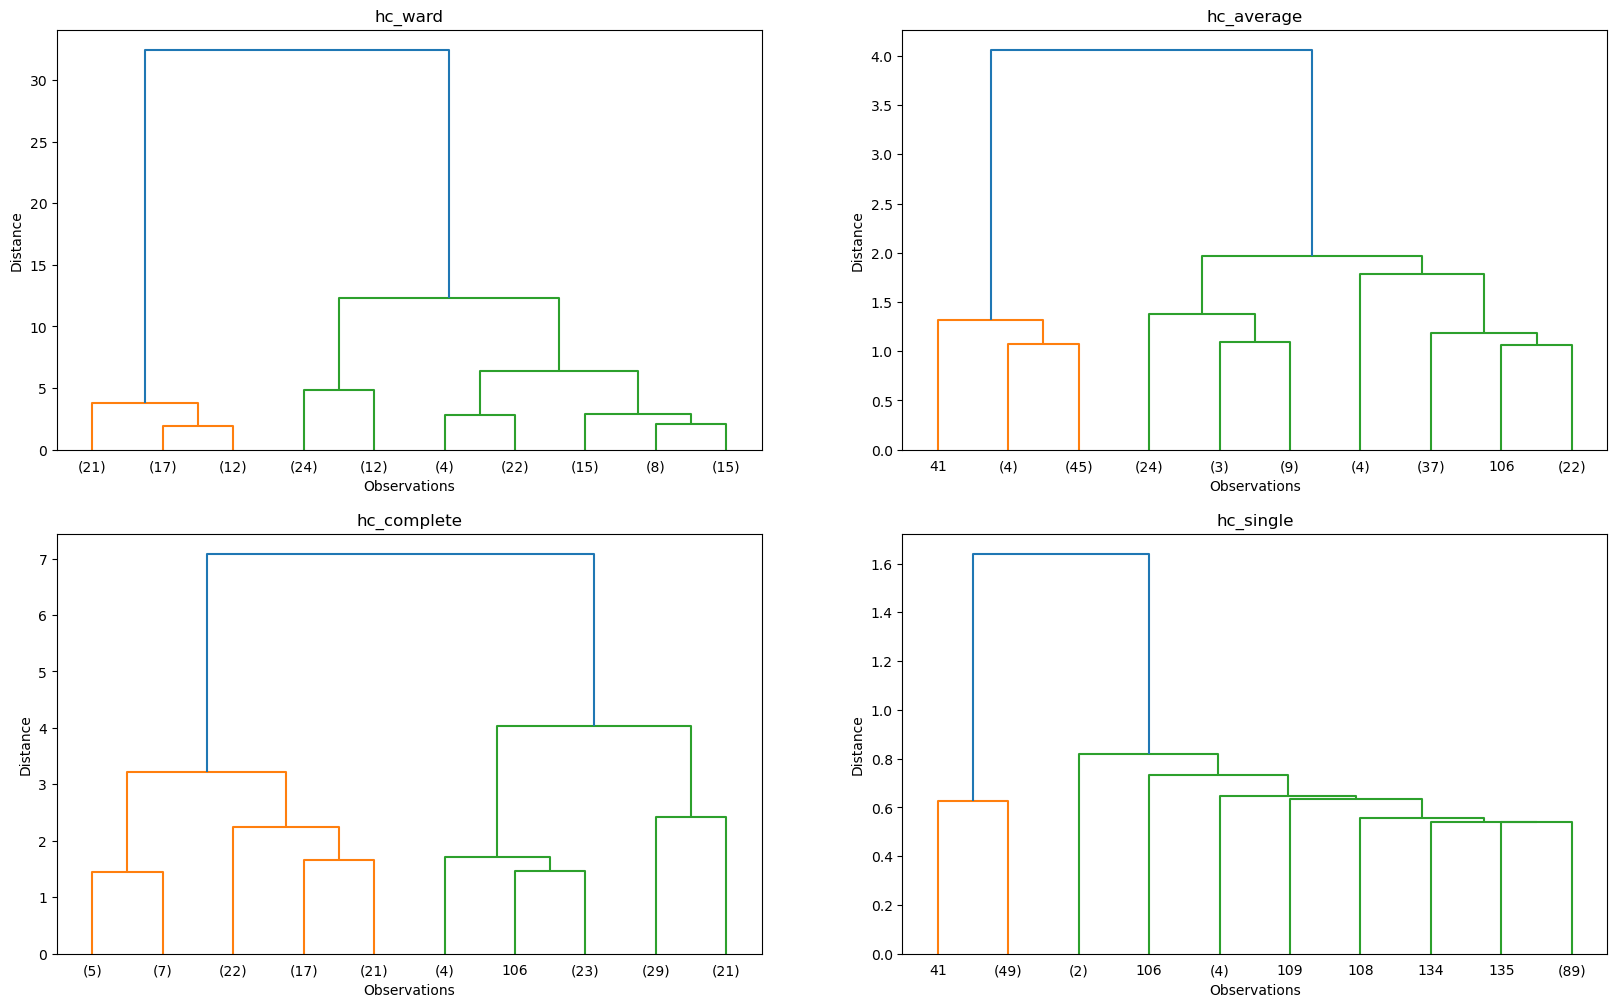

In [108]:
plt.figure(figsize = (20,12))
hc_list = [hc_ward, hc_average, hc_complete, hc_single]
k = 1
for i in hc_list:
    plt.subplot(2,2,k)
    plt.title(hc_names[k-1])  
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(i, leaf_font_size = 10, truncate_mode="lastp", p=10)
    k +=1
    
# Dendogram altındaki gözlem sayısını azaltmak için truncate_mode ve p kullandık.
# sadece 10 küme görmek için p = 10 yazdık.
# Parantez içinde yazan sayılar gözlem sayısı.

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

In [109]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [110]:
from sklearn.metrics import silhouette_score

In [111]:
K = range(2, 10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X)
    print(f"Silhoutte score for {k} clusters: {round(silhouette_score(X, model.labels_), 3)}")

# silhoutte score bize kümelemenin kalitesini gösterir. Ne kadar yüksek score o kadar kaliteli kümeleme demektir.

Silhoutte score for 2 clusters: 0.687
Silhoutte score for 3 clusters: 0.554
Silhoutte score for 4 clusters: 0.489
Silhoutte score for 5 clusters: 0.484
Silhoutte score for 6 clusters: 0.359
Silhoutte score for 7 clusters: 0.342
Silhoutte score for 8 clusters: 0.344
Silhoutte score for 9 clusters: 0.33


In [112]:
# Burada en uygun cluster sayısı 2 çıkıyor. Yukarıda dendogram ile de 2 sonucuna varmıştık.
# Ancak eğere domain knowledge baika bir cluster sayısı öneriyorsa ya da müşteri bir cluster sayısı belirtirse o uygulanır.

In [113]:
model_1 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
model_1.fit_predict(X)

# Biz burada datayı biliyoruz ve gerçetke 3 cluster olduğunu bildiğimiz için 3 üzerinden ilerlerdik.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [114]:
model_1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

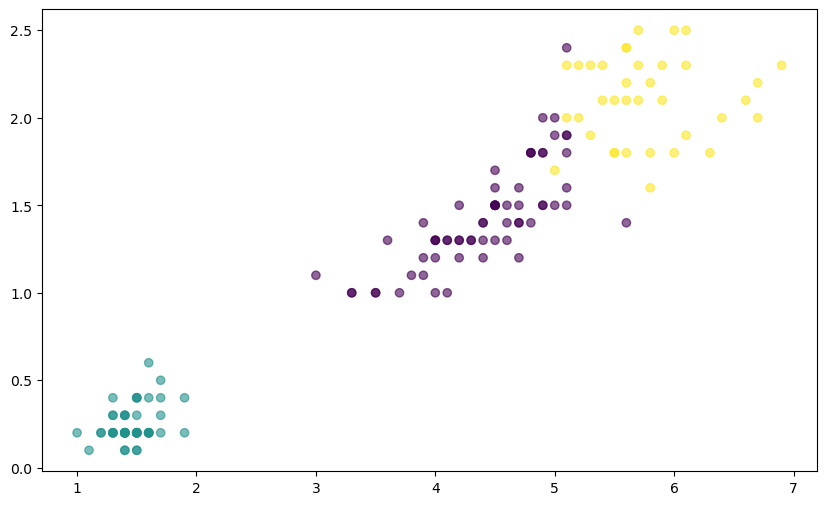

In [115]:
plt.scatter(X["petal_length"], X["petal_width"], c = model_1.labels_, alpha=0.6);
# Burad 2 feature'a göre ve 3 cluster'a göre dağılımı görüyoruz.
# Kümelerden biri rahalıkla aytılırken diğer 2 kümede içe geçmeler olmuş.

In [116]:
clusters = model_1.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [117]:
# Bizim elimizde gerçek label'lar olduğu için karşılaştırma imkanımız var.
# Gerçekte datanın 3 label'a sahip olduğunu bildiğimiz için 3 cluster üzerinden ilerledik.

labels = pd.read_csv("label.csv")
labels

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [118]:
X["predicted_clusters"] = clusters
X["labels"] = labels

In [119]:
# Burada predict ve actual label'ları dataframe'e ekledik. Crosstab ile ne kadar doğru ne kadar hatalı bakacağız.
ct = pd.crosstab(X["predicted_clusters"], X["labels"])
ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [ ]:
# Burada toplamda 16 hata yaptığımızı söyleyebiliriz.
# Model, bütün feature'ları kullanınca versicolor virginica'yı ayırt etmekde zorlandı.
# İleride daha az sayıda feature ile deneme yapacağız. Ve bu crosstab ile karşılaştıracağız.

## ARI Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [120]:
# Elimizde datamızın gerçek label'ları olduğu durumlarda ARI score kullanabiliriz.

In [121]:
from sklearn.metrics.cluster import adjusted_rand_score

In [126]:
adjusted_rand_score(X["labels"], X["predicted_clusters"])

0.7311985567707746

## Visualization Clusters

In [127]:
X_labels = X.labels.map({"versicolor" : 0, "setosa" : 1, "virginica" : 2})
X_labels

# Burada map'leme yaptık çünkü vizualization yaparken "c" değeri sadece numeric value alıyor.

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

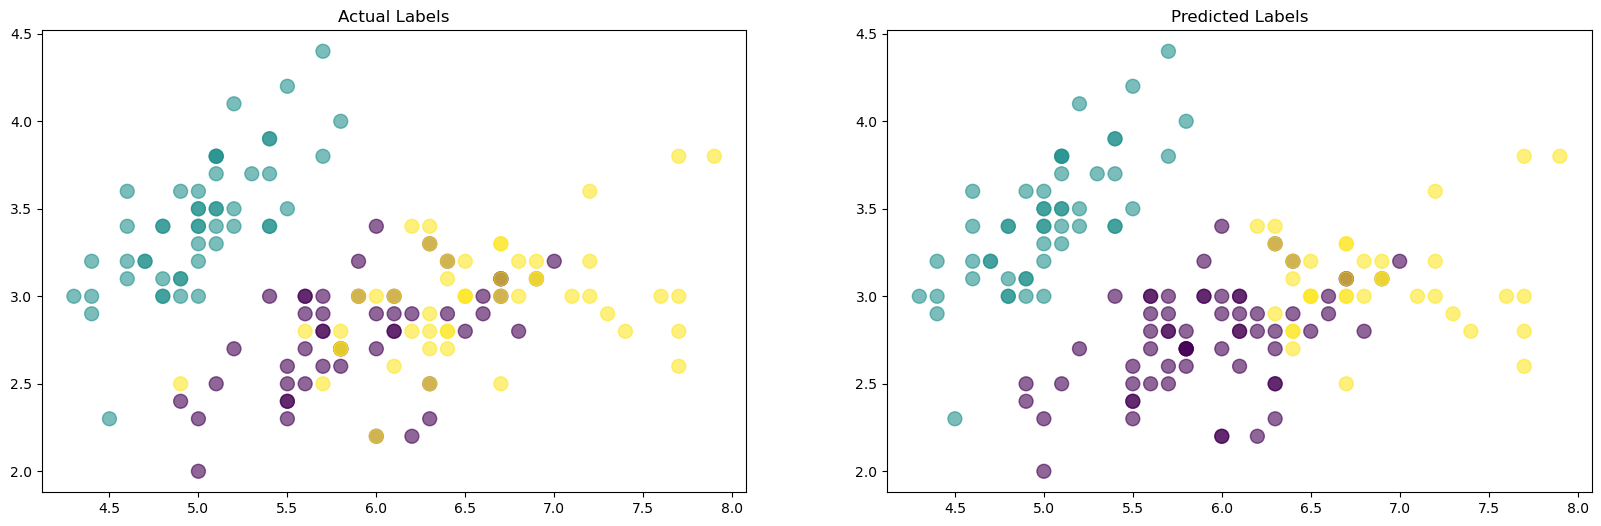

In [136]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.scatter(X["sepal_length"], X["sepal_width"], c= X_labels, alpha=0.6, s=100)
plt.title("Actual Labels")

plt.subplot(122)
plt.scatter(X["sepal_length"], X["sepal_width"], c= X.predicted_clusters, alpha=0.6, s=100)
plt.title("Predicted Labels");

In [ ]:
# Yukarıdaki grafikte "sepal_length" ve "sepal_length" feature'ları ile actual-predict karşılaştırması yaptık.
# Bir de "sepal_width" ve "petal_length" feature'ları için karşılaştıralım.

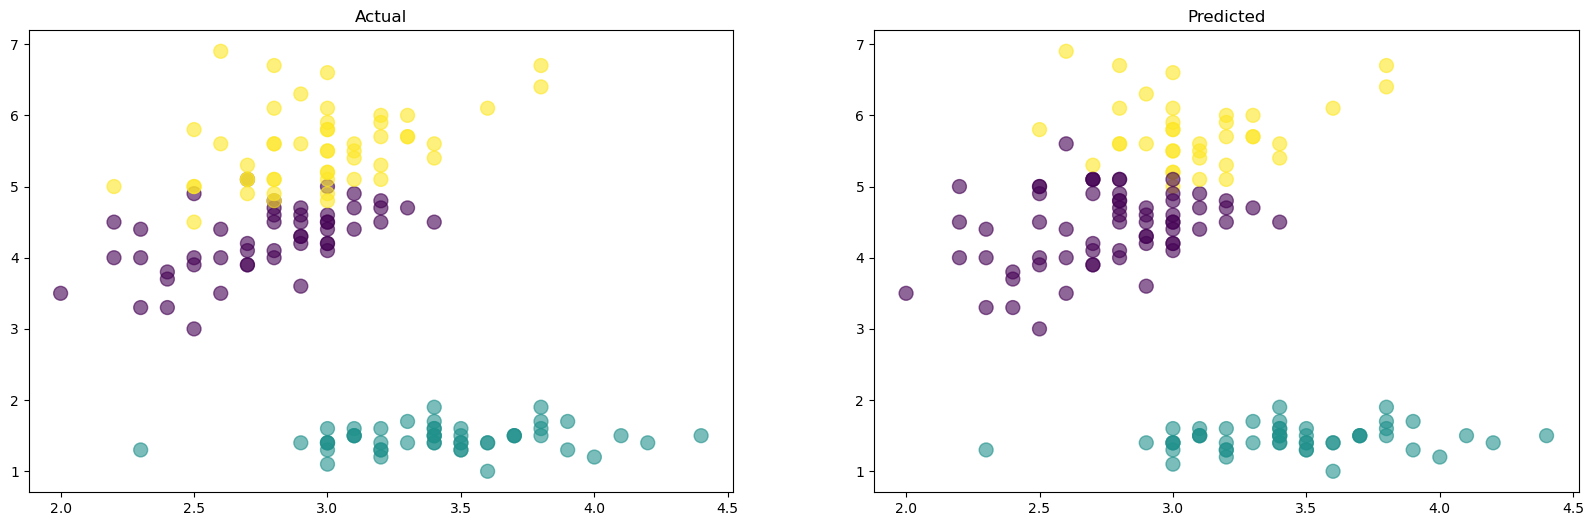

In [137]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_width"], X["petal_length"], c = X_labels, alpha=0.6, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, alpha=0.6, s=100)
plt.title("Predicted");

In [138]:
# Sanki bu iki feature ile daha iyi clustering yaptık gibi

## Remodeling according to discriminating features

In [139]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [140]:
# Hangi feature'lar clustering için daha elverişli görmek için lineplot çizdirecez.
# Bu datanın actual labelları elimizde olduğu için onun üzerinden groupby yapacağız.
# Eğer actual labelları bilmeseydik predicted labellar ile groupby yapacaktık.

In [149]:
clus_pred = X.iloc[:,[0, 1, 2, 3, 5]].groupby("labels").mean().T
clus_pred.head()

labels,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


<AxesSubplot:>

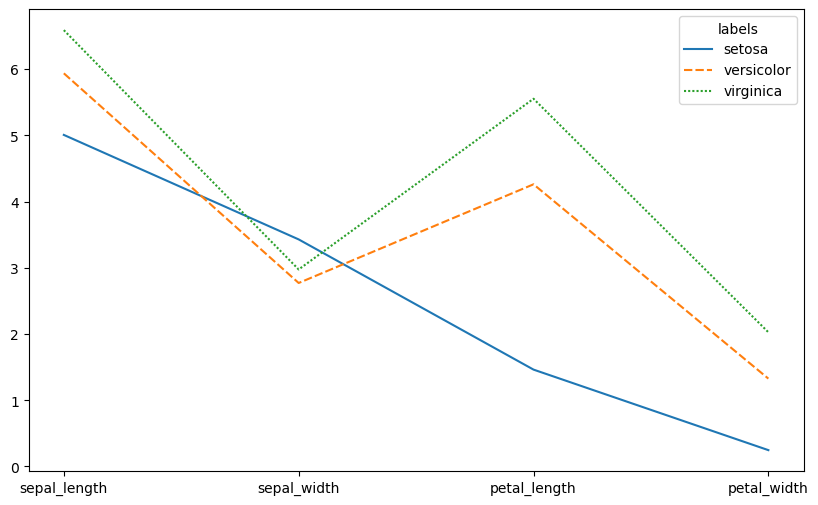

In [150]:
sns.lineplot(data=clus_pred)

In [151]:
# Burada tüm labellar için sepal_width ortalamasının birbirine çok yakın olduğunu yani bu feature un elverişsiz olduğunu gördük.
# Diğer 3'ü arasından da "petal_length" ve "petal_width" 'in clusterin içn en uygun olduğunu gördük.
# Ayrıca emin olmak için bir de boxplot'larına bakabiliriz.

In [168]:
clus_pred.index

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

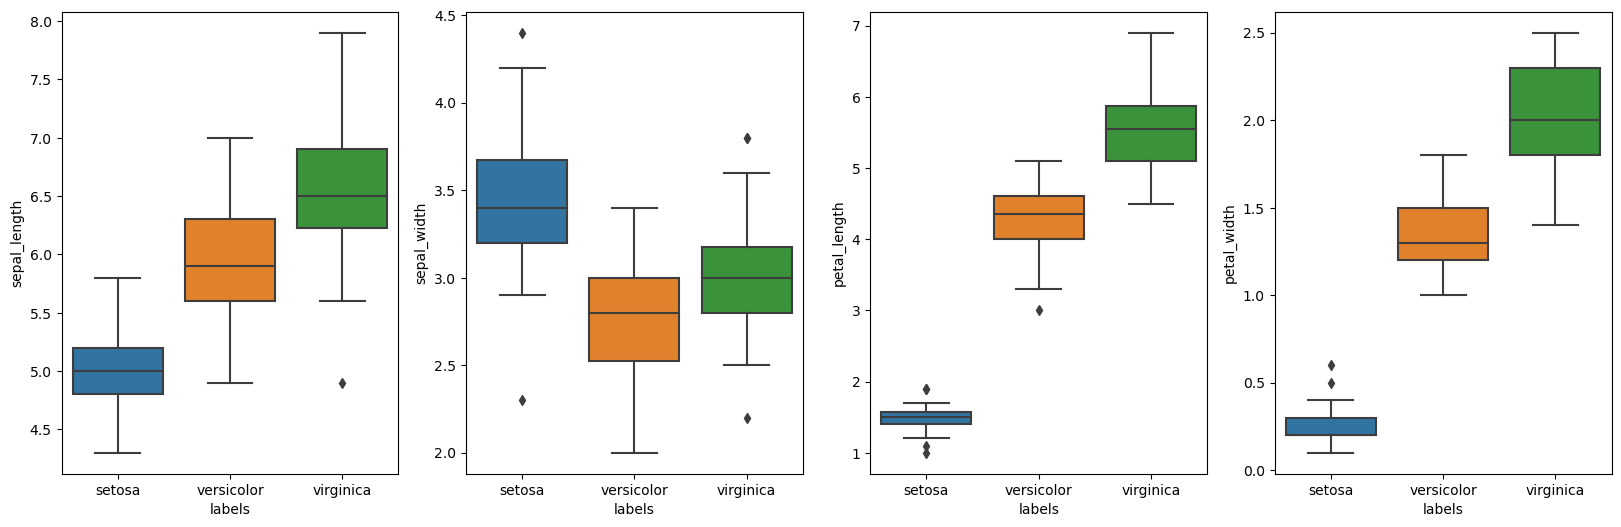

In [170]:
plt.figure(figsize=(20, 6))
i = 1
for index in clus_pred.index:
    plt.subplot(1, 4, i)
    sns.boxplot(y = index, x = "labels", data = X)
    i+= 1
    

In [172]:
# Aynı şekilde boxplot'a bakınca da en uygun 2 feature'un "petal_width" ve "petal_length" olduğunu görüyoruz.
# Bir de sadece bu 2 feature ile clustering yapmayı deneyelim.

In [177]:
X2 = X[["petal_length", "petal_width"]]
X2.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Hopkins Test

In [184]:
hopkins(X2, X2.shape[0]) # tüm featurelar ile 0.16655441395317966 elde etmiştik. Bu score ne kadar küçük o kadar iyi.
# score'da gelişme var.

0.10255552326517574

### Dendrogram

In [186]:
hc_ward = linkage(y = X2, method="ward")
hc_complete = linkage(y = X2, method="complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

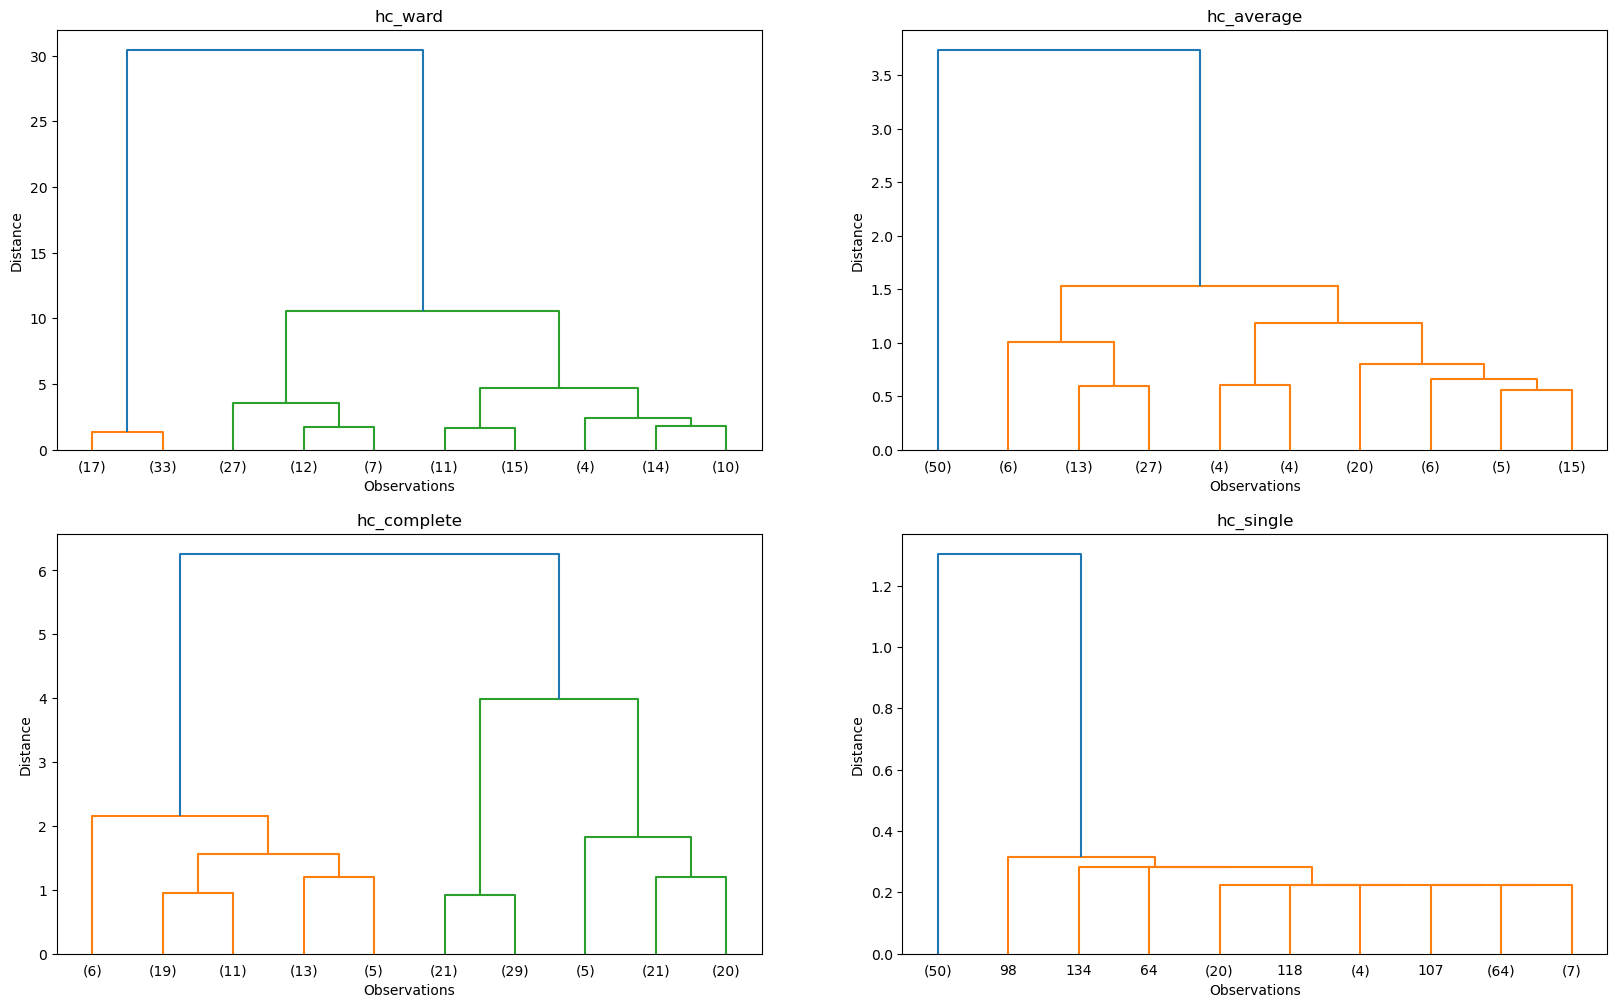

In [191]:
plt.figure(figsize = (20,12))
hc_list = [hc_ward, hc_average, hc_complete, hc_single]
k = 1
for i in hc_list:
    plt.subplot(2,2,k)
    plt.title(hc_names[k-1])  
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(i, leaf_font_size = 10, truncate_mode="lastp", p=10)
    k +=1

In [190]:
# Burada en büyük distance'ı yine "ward" ile elde ettik
# Distance ne kadr çok ise clustering o kadar iyi.

### S(Silhouette) Score

In [192]:
K = range(2, 10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.7669465622893307
Silhouette Score for 3 clusters: 0.6573949270307473
Silhouette Score for 4 clusters: 0.5895284483082736
Silhouette Score for 5 clusters: 0.5781917221789421
Silhouette Score for 6 clusters: 0.574738090950023
Silhouette Score for 7 clusters: 0.5830818101061305
Silhouette Score for 8 clusters: 0.5678904788273494
Silhouette Score for 9 clusters: 0.54699100118714


## Final model

In [193]:
final_model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
clusters = final_model.fit_predict(X2)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [194]:
X2["predicted_clusters"] = clusters
X2["labels"] = labels
X2.head()

,petal_length,petal_width,predicted_clusters,labels
0,1.4,0.2,1,setosa
1,1.4,0.2,1,setosa
2,1.3,0.2,1,setosa
3,1.5,0.2,1,setosa
4,1.4,0.2,1,setosa


In [196]:
x2_ct = pd.crosstab(X2["predicted_clusters"], X2["labels"])
x2_ct

# Burada 2 feature ile hata sayımızın 6'ya düştüğünü görüyoruz. Bütün feature'lar ile 16 hata yapmıştık.

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,50,0,0
2,0,45,1


In [197]:
X2_labels = X2.labels.map({"versicolor" : 0, "setosa" : 1, "virginica" : 2})
X2_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

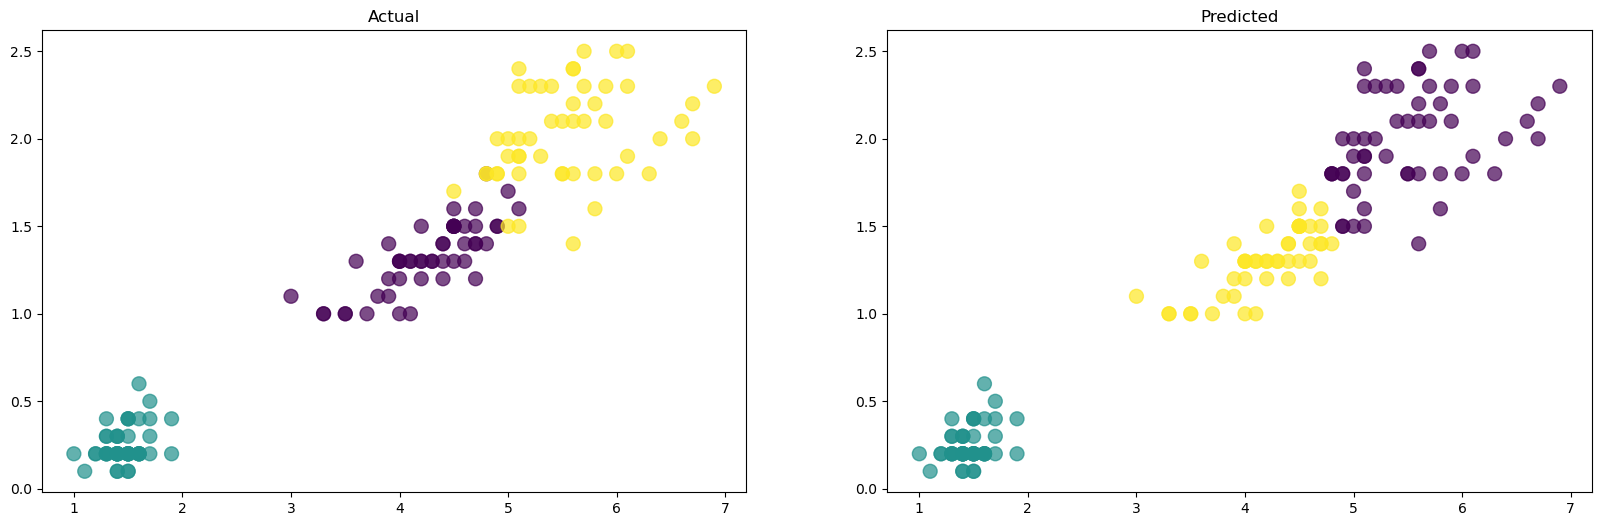

In [198]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2_labels, alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2.predicted_clusters, alpha=0.7, s=100)
plt.title("Predicted");

### ARI Score

In [199]:
adjusted_rand_score(X2["labels"], X2["predicted_clusters"])

0.8857921001989628

In [200]:
# tüm feature'lar ile ARI score = 0.731 çıkmıştı. ARI score'umuzda da belirgin bir yükselme oldu.

## Prediction cluster of new data

In [ ]:
new_data = [[1.7, 0.2], [2.3, 0.5]]

In [202]:
final_model.predict(new_data) 
# bu algoritmanın tahmin özelliği yok onun için hata verdi.
# Gözlemleri dataya atayıp model kurduktan sonra sınıfları belirleyebiliriz

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'